In [1]:
import pandas as pd
df = pd.read_csv('Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [3]:
df.describe(include='object')

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275


In [5]:
# Creating a copy of the DataFrame for processing
data_clean = df.copy()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Setting the aestheitc style of the plots
sns.set_style('darkgrid')

In [11]:
#Create Age Groups

data_clean['age_group']=pd.cut(data_clean['Age'], bins=[10, 20,30,40,50,60,70,80], labels=['10-20','20-30','30-40','40-50','50-60','60-70','70-80'])

In [23]:
#Analyze the distribution of smoking status across different age groups and genders
smoking_status_distribution = pd.crosstab(index=[data_clean['age_group'], data_clean['Gender']], columns=data_clean['Smoking'])
smoking_status_distribution

Smoking           No  Yes
age_group Gender         
10-20     F       10    0
          M        3    0
20-30     F       85    3
          M        6    2
30-40     F       92    0
          M        7   12
40-50     F       50    0
          M        7    4
50-60     F       36    2
          M        6    6
60-70     F       23    1
          M        2    7
70-80     F        6    3
          M        0    7

In [13]:
# Calculate the percentage of smokers within each age group and gender category
smoking_status_percentage = smoking_status_distribution.div(smoking_status_distribution.sum(axis=1), axis=0)* 100
smoking_status_percentage

Smoking                   No         Yes
age_group Gender                        
10-20     F       100.000000    0.000000
          M       100.000000    0.000000
20-30     F        96.590909    3.409091
          M        75.000000   25.000000
30-40     F       100.000000    0.000000
          M        36.842105   63.157895
40-50     F       100.000000    0.000000
          M        63.636364   36.363636
50-60     F        94.736842    5.263158
          M        50.000000   50.000000
60-70     F        95.833333    4.166667
          M        22.222222   77.777778
70-80     F        66.666667   33.333333
          M         0.000000  100.000000

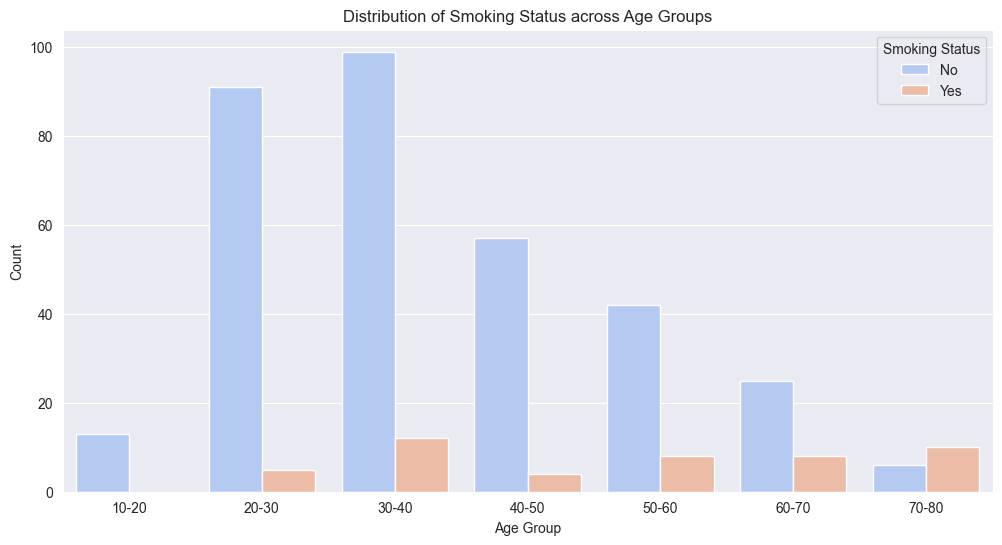

In [14]:
#Visualize the distribution of smoking status across different age groups and genders
plt.figure(figsize=(12,6))
sns.countplot(x='age_group', hue='Smoking', data=data_clean, palette='coolwarm')
plt.title('Distribution of Smoking Status across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()

In [15]:
#import necessary libraries for statisitical testing
from scipy.stats import ttest_ind

In [ ]:
#Select only the relevant columns for health indicators
health_data = data_clean[['current_smoker','heart_rate','systolic_bp','diastolic_bp','chol']]